In [1]:
# load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# mount drive to google colab
from google.colab import drive
drive.mount('/content/drive')

# mount specific file path to notebook
%cd /content/drive/Othercomputers/My_laptop/KPMG_virual_internship/Task_one

Mounted at /content/drive
/content/drive/Othercomputers/My_laptop/KPMG_virual_internship/Task_one


In [3]:
# load in the trasactions dataset and print few lines
transaction_data = pd.read_excel("/content/drive/Othercomputers/My_laptop/KPMG_virual_internship/Task_one/KPMG_VI_New_raw_data_update_final.xlsx", 'Transactions', skiprows = [0])
transaction_data.head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0



### Data Quality Issues to Check
*   Duration of the transaction data
*   Data types of each varaible
*   Check for duplicated values
*   Check for outliers in the numerical data
*   Check for inconsistent labels



In [9]:
# Get the duration of the transaction
min = transaction_data['transaction_date'].min()
max = transaction_data['transaction_date'].max()

print('The transaction data is from:', min, 'to', max)

The transaction data is from: 2017-01-01 00:00:00 to 2017-12-30 00:00:00


In [10]:
# get information about data types and missing values
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

* Some variables have in appropiate data types, so they need to be converted.

* Some Variables has missing values, however I will leave them in the dataset because it won't affect my analysis

In [11]:
# Convert the below columns to object because they are labels
columns_to_convert = ['transaction_id', 'product_id', 'customer_id', 'online_order']
transaction_data[columns_to_convert] = transaction_data[columns_to_convert].astype(str)

# check if they have been changed
transaction_data[columns_to_convert].dtypes

transaction_id    object
product_id        object
customer_id       object
online_order      object
dtype: object

In [12]:
# convert product first sold data to year, month and day from epochs
transaction_data['product_first_sold_date'] = transaction_data['product_first_sold_date'].apply(lambda x: pd.Timestamp('1899-12-31') + pd.Timedelta(x, unit='days'))
transaction_data['product_first_sold_date'].head()

0   2012-12-03
1   2014-03-04
2   1999-07-21
3   1998-12-17
4   2015-08-11
Name: product_first_sold_date, dtype: datetime64[ns]

In [13]:
# check for duplicated values
transaction_data.duplicated().sum()

0

In [14]:
# get number of rows and columns
transaction_data.shape

(20000, 15)

In [15]:
# get number of unique customers
transaction_data['customer_id'].nunique()

3494

> No duplicates in the dataset.

In [16]:
# get numerical summary for: list price and standard cost
numerical_columns = transaction_data[['list_price', 'standard_cost']]
numerical_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
list_price,20000.0,1107.829449,582.825242,12.01,575.27,1163.89,1635.3,2091.47
standard_cost,19803.0,556.046951,405.955660,7.21,215.14,507.58,795.1,1759.85


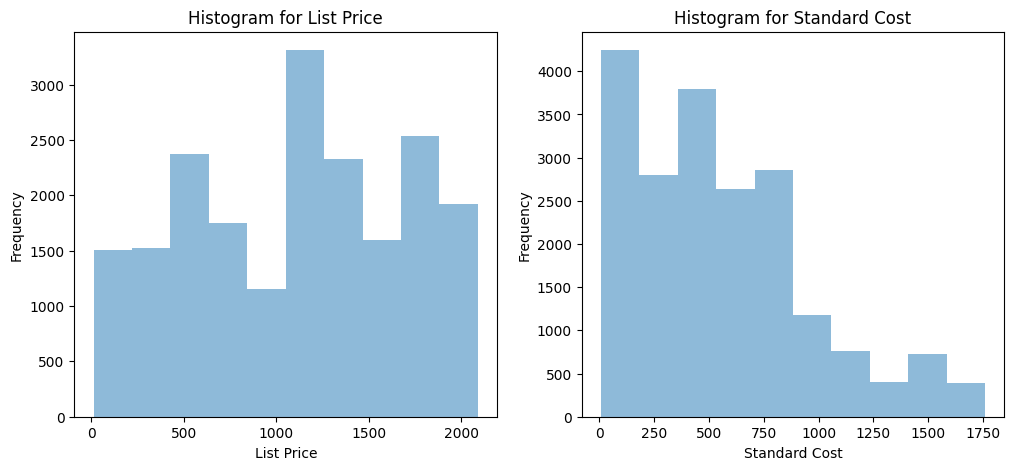

In [17]:
# plot histograms to view the distrubution of the data
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
numerical_columns['list_price'].plot.hist(bins=10, alpha=0.5)
plt.xlabel('List Price')
plt.ylabel('Frequency')
plt.title('Histogram for List Price')

plt.subplot(1,2,2)
numerical_columns['standard_cost'].plot.hist(bins=10, alpha=0.5)
plt.xlabel('Standard Cost')
plt.ylabel('Frequency')
plt.title('Histogram for Standard Cost')

plt.show()

> The quantitative data seems to be normally distributed, no abnormaility observed.

In [18]:
# check for inconsistent labels
categorical_columns = transaction_data[['order_status', 'brand', 'product_line', 'product_class', 'product_size']]

for col in categorical_columns:
    print(f'Value counts for {col}:')
    print(transaction_data[col].value_counts())
    print()

Value counts for order_status:
order_status
Approved     19821
Cancelled      179
Name: count, dtype: int64

Value counts for brand:
brand
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: count, dtype: int64

Value counts for product_line:
product_line
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: count, dtype: int64

Value counts for product_class:
product_class
medium    13826
high       3013
low        2964
Name: count, dtype: int64

Value counts for product_size:
product_size
medium    12990
large      3976
small      2837
Name: count, dtype: int64



> No data with inconsistent labels

In [19]:
# aggregate data based on customer id for analysis purpose
transaction_data_grouped = transaction_data.groupby(['customer_id'], as_index = False).agg({
    'transaction_id': 'nunique',
    'product_id' : 'nunique',
    'list_price': 'sum'
})

# pivot the data to have counts to approved and cancelled orders for each customer
status_counts = transaction_data.pivot_table(index='customer_id', columns='order_status', aggfunc='size', fill_value=0)
status_counts = status_counts.reset_index()

# merge the both data
customer_transaction = pd.merge(transaction_data_grouped, status_counts, on='customer_id', how='left')

# rename the transaction_id
customer_transaction.rename(columns = {'transaction_id': 'Number_of_transactions', 'product_id': 'Number of Products', 'list_price' : 'amount_spent'},
                            inplace = True)

# display few lines
customer_transaction.head()

,customer_id,Number_of_transactions,Number of Products,amount_spent,Approved,Cancelled
0,1,11,11,9084.45,11,0
1,10,6,6,7067.83,6,0
2,100,2,2,2748.20,2,0
3,1000,9,9,10183.70,9,0
4,1001,7,7,6233.51,7,0


In [21]:
# save data to csv
customer_transaction.to_csv('transaction_data_cleaned.csv', index = False)